In [7]:
#import module 
#imports PIL module
from PIL import Image

#open method used to different estimation image file 
im=Image.open(r"C:\Users\AnshuL PanwaR\OneDrive\Pictures\WhatsApp Image 2023-04-26 at 11.38.08.png")

#this method will show image in any image viewer
im.show 

<bound method Image.show of <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=669x438 at 0x24B3FE01040>>

Text(0.5, 1.0, 'original\xa0RGB\xa0image')

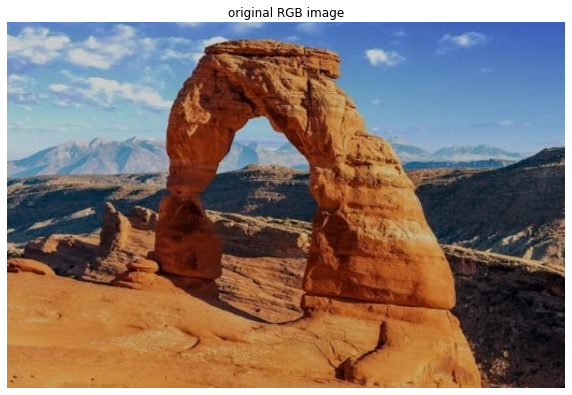

In [10]:
import requests 
import cv2
import numpy as np
import matplotlib.pyplot as plt

img =cv2.imread(r"C:\Users\AnshuL PanwaR\OneDrive\Pictures\WhatsApp Image 2023-04-26 at 11.38.08.png")
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title("original RGB image")

Text(0.5, 1.0, 'Gray\xa0Image')

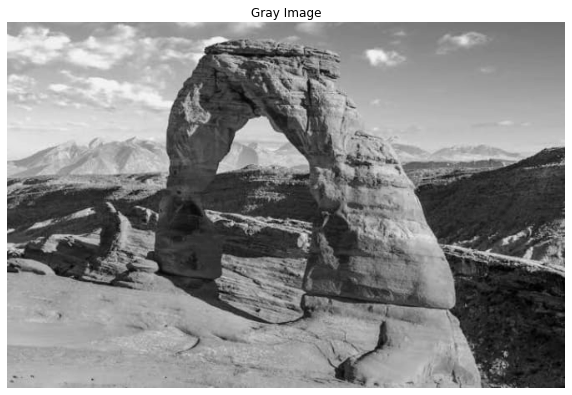

In [11]:
gray_image=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')

In [12]:
# Calculating the SVD
u, s, v= np.linalg.svd(gray_image, full_matrices=False)

#inspect shapes of the matrices
print(f'u.shape:{u.shape},s.shape:{s.shape},v.shape:{v.shape}')

u.shape:(438, 438),s.shape:(438,),v.shape:(438, 669)


variance Explained by 25 singular values:
[0.278867 0.048247 0.032113 0.025797 0.019506 0.018945 0.01619  0.014749
 0.013959 0.012456 0.011334 0.011104 0.010393 0.00999  0.009615 0.009416
 0.008751 0.008347 0.00791  0.007539]


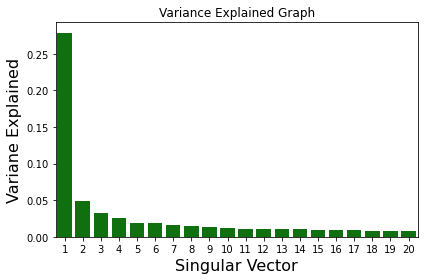

In [13]:
# import module
import seaborn as sns

var_explained = np.round(s*2/np.sum(s*2),decimals=6)

# Variance explained top singular vectors
print(f'variance Explained by 25 singular values:\n{var_explained[0:20]}')

sns.barplot(x=list(range(1,21)),
           y=var_explained[0:20],color="green")
      
plt.title('Variance Explained Graph')
plt.xlabel('Singular Vector', fontsize=16)
plt.ylabel('Variane Explained', fontsize=16)
plt.tight_layout()
plt.show()

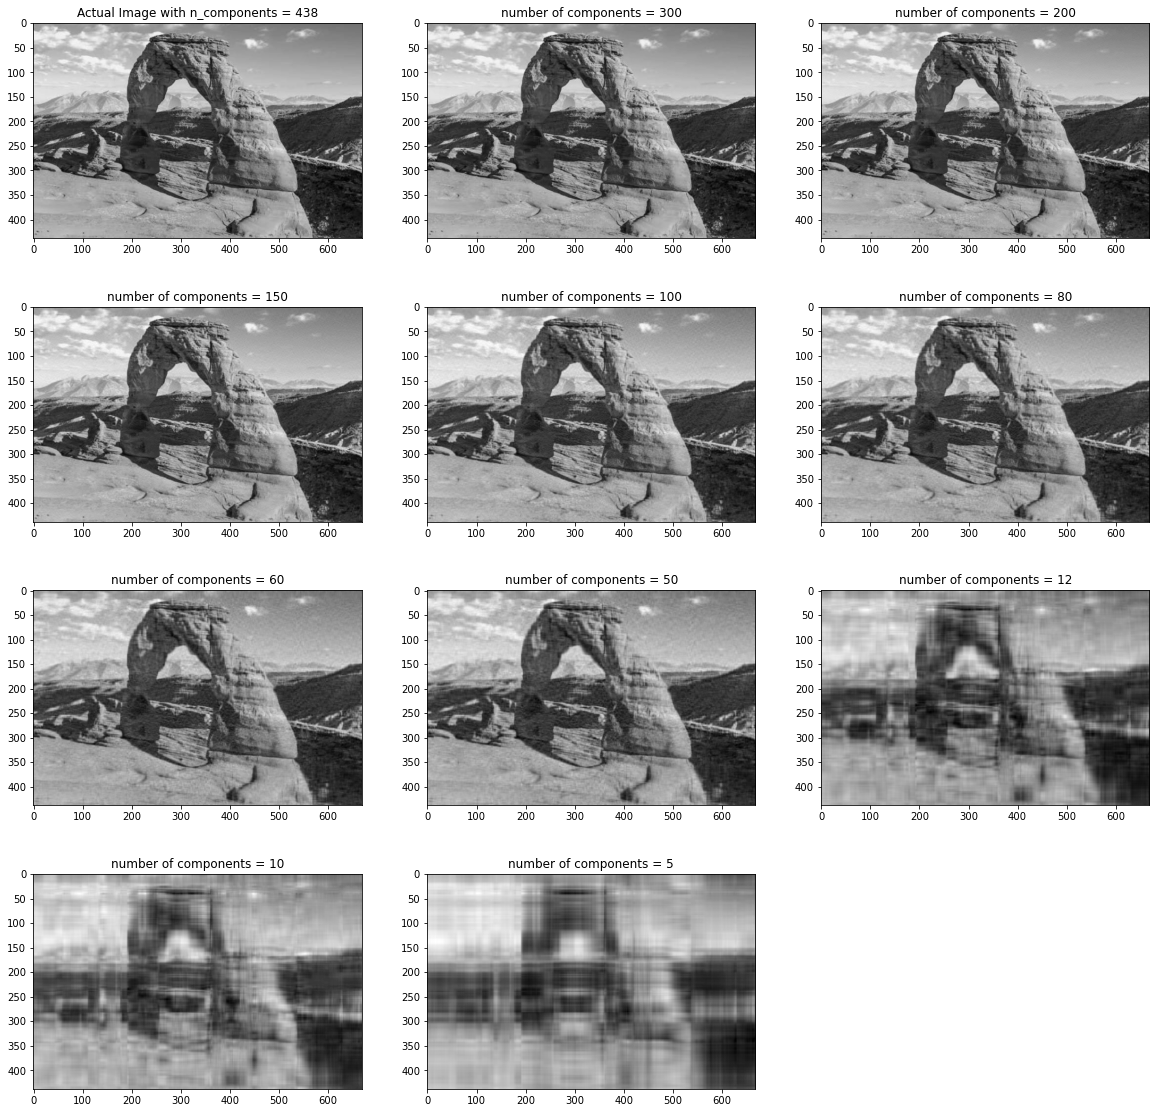

In [14]:
# Plot immages with different number of components
comps = [438,300,200,150,100,80,60,50,12,10,5]
plt.figure(figsize=(20,20))

for i in range(len(comps)):
    low_rank=u[:,:comps[i]] @ np.diag(s[:comps[i]]) @ v[:comps[i],:]
    
    if(i==0):
        plt.subplot(4,3, i+1),
        plt.imshow(low_rank, cmap='gray'),
        plt.title(f'Actual Image with n_components = {comps[i]}')
    else:
        plt.subplot(4,3, i+1),
        plt.imshow(low_rank, cmap='gray'),
        plt.title(f'number of components = {comps[i]}')